In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,mean_squared_error,r2_score,precision_score,recall_score,f1_score

In [35]:
df=pd.read_csv("cleaned_data.csv")

In [36]:
area_yield = df.groupby("Area")["hg/ha_yield"].sum().sort_values(ascending=False).head(10)
area_yield

Area
India             261388913
Brazil            129523795
Mexico            106322359
Australia          97212600
Japan              93745379
Indonesia          61849507
Pakistan           45117720
Turkey             44996140
United Kingdom     44335992
Spain              41924247
Name: hg/ha_yield, dtype: int64

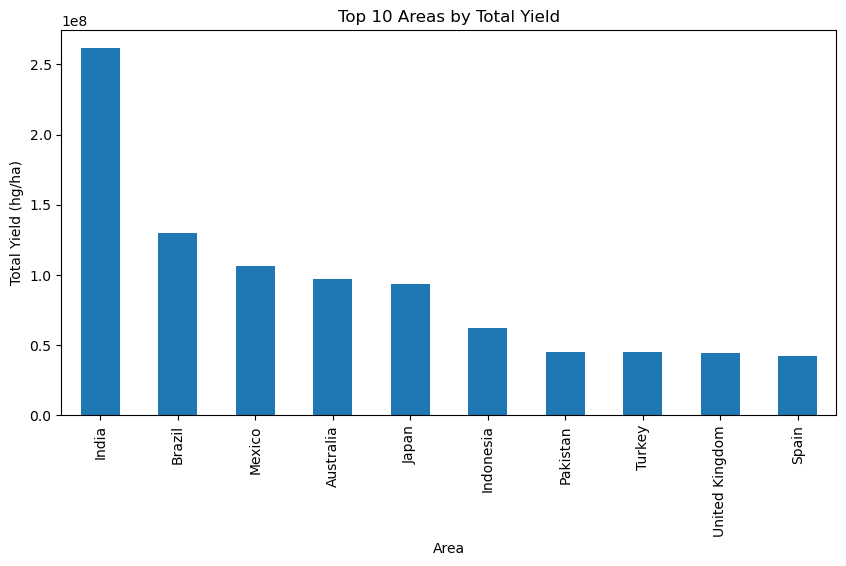

In [37]:
area_yield.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Areas by Total Yield")
plt.xlabel("Area")
plt.ylabel("Total Yield (hg/ha)")
plt.show()

In [38]:
item_yield = df.groupby("Item")["hg/ha_yield"].sum().sort_values(ascending=False).head(10)
item_yield

Item
Potatoes          785921609
Sweet potatoes    310269345
Cassava           275132269
Maize             142020761
Wheat             106614786
Yams               86769760
Sorghum            52906376
Soybeans           49957039
Name: hg/ha_yield, dtype: int64

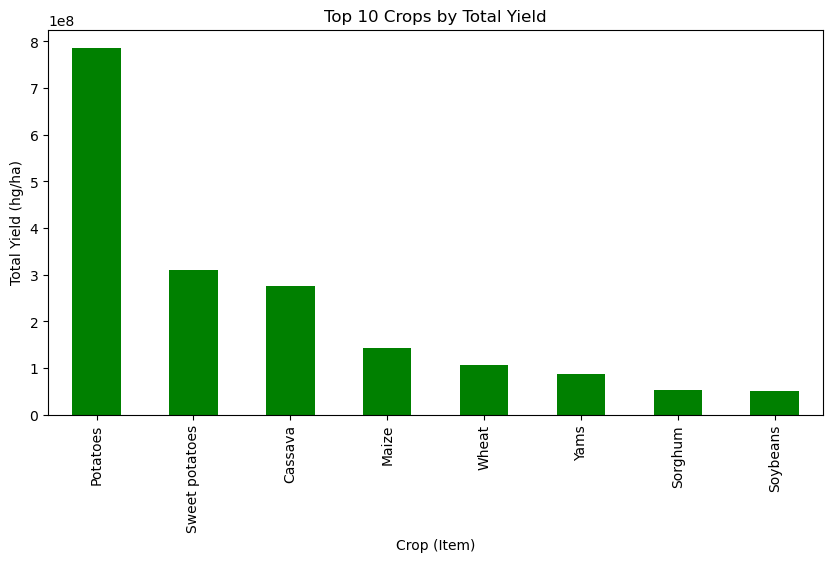

In [39]:
item_yield.plot(kind="bar", figsize=(10,5), color="green")
plt.title("Top 10 Crops by Total Yield")
plt.xlabel("Crop (Item)")
plt.ylabel("Total Yield (hg/ha)")
plt.show()

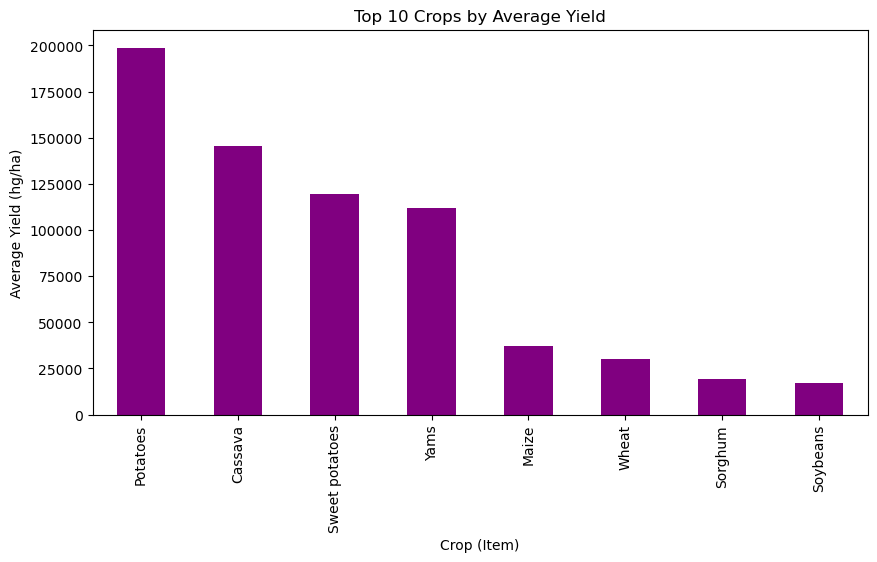

In [40]:
avg_item_yield = df.groupby("Item")["hg/ha_yield"].mean().sort_values(ascending=False).head(10)

avg_item_yield.plot(kind="bar", figsize=(10,5), color="purple")
plt.title("Top 10 Crops by Average Yield")
plt.xlabel("Crop (Item)")
plt.ylabel("Average Yield (hg/ha)")
plt.show()

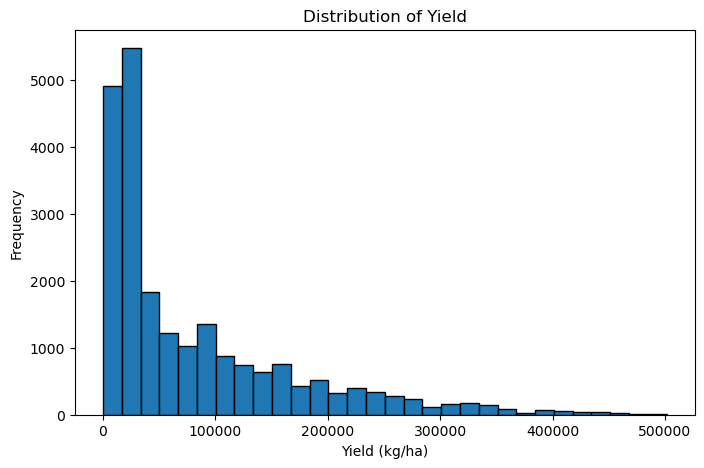

In [41]:
plt.figure(figsize=(8,5))
plt.hist(df["hg/ha_yield"], bins=30, edgecolor='black')
plt.title("Distribution of Yield")
plt.xlabel("Yield (kg/ha)")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='average_rain_fall_mm_per_year', ylabel='Count'>

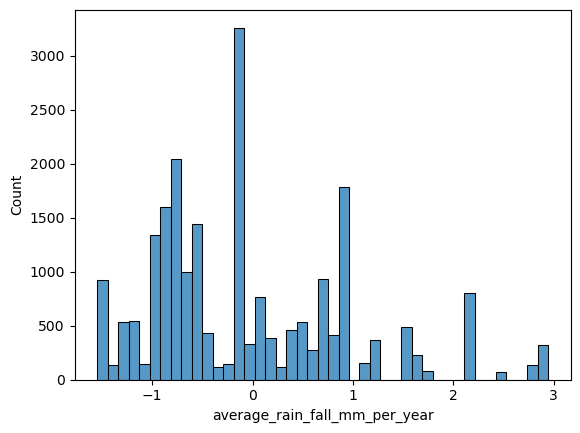

In [42]:
sns.histplot(df['average_rain_fall_mm_per_year'])

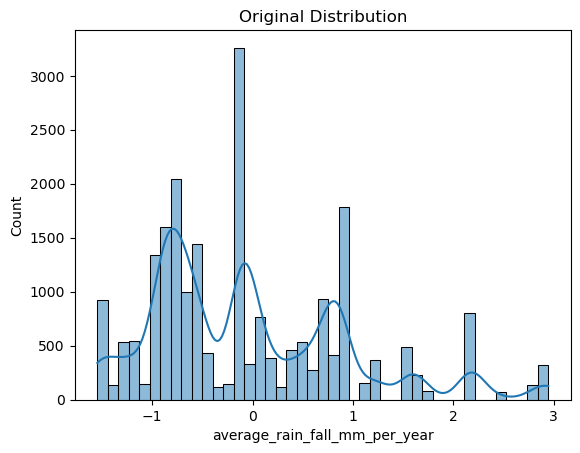

Skewness before: 0.896510871057081


In [43]:
sns.histplot(df['average_rain_fall_mm_per_year'], kde=True)
plt.title("Original Distribution")
plt.show()
print("Skewness before:", df['average_rain_fall_mm_per_year'].skew())



<Axes: xlabel='pesticides_tonnes', ylabel='Count'>

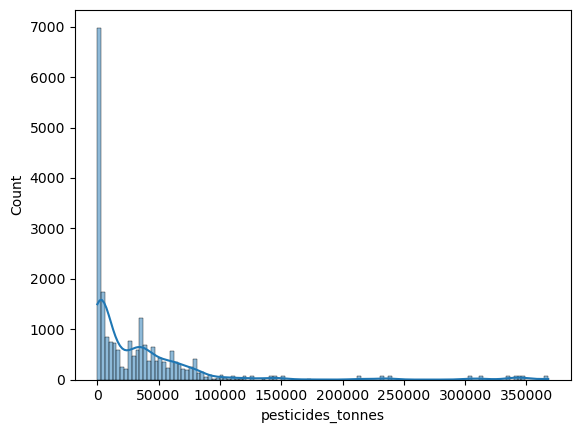

In [44]:
sns.histplot(df['pesticides_tonnes'], kde=True)


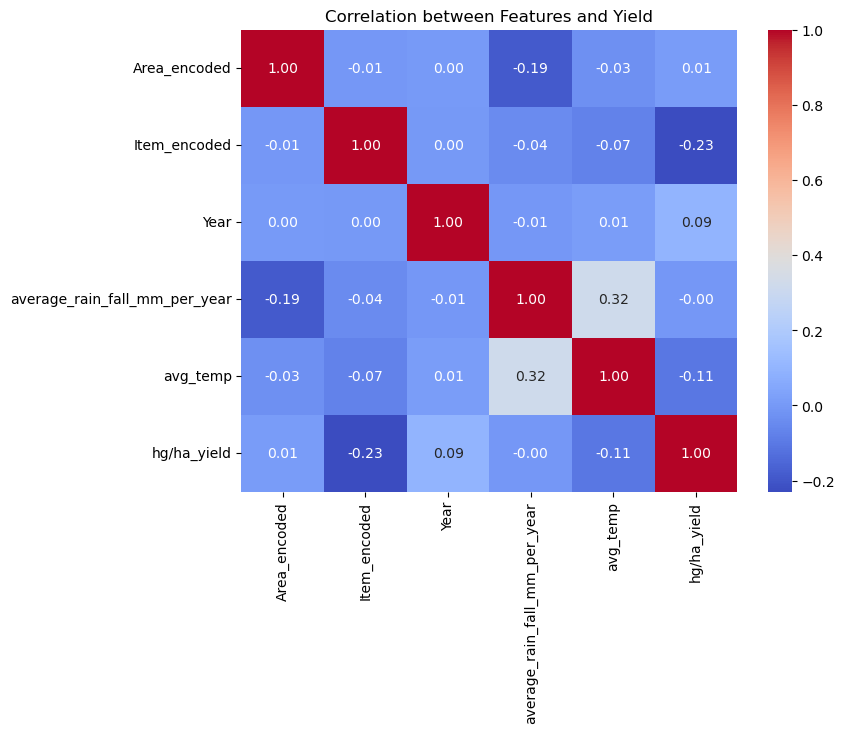

In [45]:
selected_cols = ['Area_encoded', 'Item_encoded', 'Year', 'average_rain_fall_mm_per_year', 'avg_temp', 'hg/ha_yield']
corr = df[selected_cols].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation between Features and Yield")
plt.show()